# TUTORIALS

These are useful notes/codes I have taken from Andreas Muller's Applied Machine Learning Course at Columbia. 

## K Nearest Neighbors

In [393]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [ ]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
knn.score(X_test, y_test)
knn.predict(X_test)

In [ ]:
# decide on what number of nearest neighbors we should consider.
X_trainval, X_test, y_trainval, y_test = train_test_split(X, y)
X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval)

val_score = []
neighbors = np.arange(1,15,2)
for i in neighbors:
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    val_score.append(knn.score(X_val, y_val))
best_n_neighbor = neighbors[np.argmax(val_score)]

knn = KNeighborsClassifier(n_neighbors=best_n_neighbor)
knn.fit(X_trainval, y_trainval)
knn.score(X_test, y_test)
y_pred = knn.predict(X_test)

## Cross Validation

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

cross_val_score = []

for i in neighbors:
    knn = KNeighborsClassifier(n_neighbors=i)
    scores = cross_val_score(knn, X_train, y_train, cv=10)
    cross_val_score.append(np.mean(scores))
    
best_n_neighbor = neighbors[np.argmax(cross_val_score)]

knn = KNeighborsClassifier(n_neighbors=best_n_neighbor)
knn.fit(X_train, y_train)
knn.score(X_test, y_test)

## Grid Search Cross Validation

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y)

param_grid = {'n_neighbors': np.arange(1, 15, 2)}

grid = GridSearchCV(KNeighborsClassifier(), param_grid=param_grid, cv=10, return_train_score=true)
grid.fit(X_train, y_train)

grid.best_score_
grid.best_params_
grid.score(X_test, y_test)

#or

print("test-set score: {:.3f}").format(grid.score(X_test, y_test))

In [ ]:
results = pd.DataFrame(grid.cv_results_)
results.columns
results.params

### Kfold

In [ ]:
dc=DummyClassifier('most_frequent')

kf = KFold(n_splits=5, shuffle=True)
res = cross_val_score(dc, X, y, cv=kf)
np.mean(res), res.std()

### Stratistification

In [ ]:
skf = StratifiedKFold(n_splits=5, shuffle=True)
res = cross_val_score(dc, X, y, cv=skf)
np.mean(res), res.std()

### Shuffle Split

In [ ]:
ss = ShuffleSplit(n_splits=20, train_size=0.4, test_size=0.3)
rs = RepeatedStratifiedKFold(n_splits=5, n_repeats=10)

In [ ]:
cross_val_score(KNeighborsClassifier(), X, y, cv=ss)
cross_val_score(KNeighborsClassifier(), X, y, cv=rs)

### Cross Validate

In [ ]:
res = cross_validate(KNeighborsClassifier(), X, y, return_train_score=True, scoring=["accuracy","roc_auc"])
res_df = pd.DataFrame(res)

## Standard Scaler

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)

ridge = Ridge().fit(X_train_scaled, y_train)
X_test_scaled = scaler.transform(X_test)
ridge.score(X_test_scaled, y_test)

## Pipeline

In [410]:
knn_pipe = make_pipeline(StandardScaler(), KNeighborsRegressor())

print(knn_pipe.steps)

[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('kneighborsregressor', KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform'))]


In [414]:
pipe = Pipeline((("scaler", StandardScaler()), ("regressor",KNeighborsRegressor)))

print(pipe)

Pipeline(memory=None,
         steps=(('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('regressor',
                 <class 'sklearn.neighbors.regression.KNeighborsRegressor'>)),
         verbose=False)


In [ ]:
param_grid = {'kneighborsregressor__n_neighbors': range(1, 10)}
grid = GridSearchCV(knn_pipe, param_grid, cv=10)
grid.fit(X_train, y_train)
print(grid.best_params_)
print(grid.score(X_test, y_test))

### Going wild with Pipelines

In [415]:
from sklearn.datasets import load_diabetes

In [418]:
diabetes = load_diabetes()

In [419]:
X_train, X_test, y_train, y_test = train_test_split(diabetes.data, diabetes.target, random_state=0)

In [423]:
pipe = make_pipeline(StandardScaler(), PolynomialFeatures(), Ridge())

In [ ]:
param_grid = {'polynomialfeatures__degree': [1, 2, 3], 'ridge__alpha': [0.001, 0.01, 0.1, 1, 10, 100]}
grid = GridSearchCV(pipe, param_grid=param_grid, n_jobs=-1, return_train_score=True, cv=5)
grid.fit(X_train, y_train)

In [427]:
pipe = Pipeline([('scaler', StandardScaler()), ('regressor', Ridge())])

In [431]:
param_grid = {'scaler': [StandardScaler(), MinMaxScaler(), 'passthrough'],
             'regressor':[Ridge(), Lasso()], 'regressor__alpha': np.logspace(-3, 3, 7)}

In [434]:
grid = GridSearchCV(pipe, param_grid, cv=5)

In [435]:
grid.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('scaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('regressor',
                                        Ridge(alpha=1.0, copy_X=True,
                                              fit_intercept=True, max_iter=None,
                                              normalize=False,
                                              random_state=None, solver='auto',
                                              tol=0.001))],
                                verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'regressor'...
                                             random_state=None,
                                             se

In [436]:
grid.score(X_test, y_test)

0.35500225702888577

### Going wildest with Pipelines: 
using lists of dictionaries for param_grid to check out searchgrid for more convenience**

In [439]:
pipe = Pipeline([('scaler', StandardScaler()), ('regressor', Ridge())])

In [440]:
param_grid = [{'regressor': [DecisionTreeRegressor()], 'regressor__max_depth':[2, 3, 4],
               'scaler':['passthrough']},
              {'regressor':[Ridge()], 'regressor__alpha': [0.1, 1],
               'scaler':[StandardScaler(), MinMaxScaler(), 'passthrough']}]

In [441]:
grid = GridSearchCV(pipe, param_grid = param_grid, cv=5)

In [442]:
grid.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('scaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('regressor',
                                        Ridge(alpha=1.0, copy_X=True,
                                              fit_intercept=True, max_iter=None,
                                              normalize=False,
                                              random_state=None, solver='auto',
                                              tol=0.001))],
                                verbose=False),
             iid='warn', n_jobs=None,
             param_grid=[{'regressor...
                         {'regressor': [Ridge(alpha=0.1, copy_X=True,
                                         

In [443]:
grid.score(X_test, y_test)

0.36901969445308325

## Categorical Data: Ordinal Encoding

In [585]:
df = pd.DataFrame({'boro':['Manhattan','Queens','Manhattan','Brooklyn','Brooklyn', 'Bronx'],
                   'salary':[103, 89, 142, 54, 63, 219],
                   'vegan':['No','No','No','Yes','Yes','No']})

In [586]:
df

,boro,salary,vegan
0,Manhattan,103,No
1,Queens,89,No
2,Manhattan,142,No
3,Brooklyn,54,Yes
4,Brooklyn,63,Yes
5,Bronx,219,No


In [447]:
df['boro_ordinal'] = df.boro.astype("category").cat.codes

In [448]:
df

,boro,salary,vegan,boro_ordinal
0,Manhattan,103,No,2
1,Queens,89,No,3
2,Manhattan,142,No,2
3,Brooklyn,54,Yes,1
4,Brooklyn,63,Yes,1
5,Bronx,219,No,0


### One-Hot (Dummy) Encoding

In [451]:
pd.get_dummies(df, columns=['boro'])

,salary,vegan,boro_ordinal,boro_Bronx,boro_Brooklyn,boro_Manhattan,boro_Queens
0,103,No,2,0,0,1,0
1,89,No,3,0,0,0,1
2,142,No,2,0,0,1,0
3,54,Yes,1,0,1,0,0
4,63,Yes,1,0,1,0,0
5,219,No,0,1,0,0,0


In [587]:
df['boro'] = pd.Categorical(df.boro, categories=['Manhattan','Queens','Brooklyn','Bronx','Staten Island'])

pd.get_dummies(df, columns=['boro'])

,salary,vegan,boro_Manhattan,boro_Queens,boro_Brooklyn,boro_Bronx,boro_Staten Island
0,103,No,1,0,0,0,0
1,89,No,0,1,0,0,0
2,142,No,1,0,0,0,0
3,54,Yes,0,0,1,0,0
4,63,Yes,0,0,1,0,0
5,219,No,0,0,0,1,0


In [ ]:
#OneHotEncoder

ce = OneHotEncoder().fit(df)
ce.transform(df).toarray()

#OneHotEncoder + Column Transformer
#Always use Column Transformer

categorical = df.dtypes == object

preprocess = make_column_transformer(
            (StandardScaler(), ~categorical),
            (OneHotEncoder(), categorical))

model = make_pipeline(preprocess, LogisticRegression())

In [452]:
#Target Encoder
te = TargetEncoder(cols='zipcode').fit(X_train, y_train)
te.transform(X_train)

y_train.groupby(X_train.zipcode).mean()[X_train.head().zipcode]

In [ ]:
X = data.frame.drop(['date','price','zipcode'], axis=1)
scores = cross_val_score(Ridge(), X, target)
np.mean(scores)

In [ ]:

X = data.frame.drop(['date', 'price'], axis=1)

ct = make_column_transformer((OneHotEncoder(), ['zipcode']), remainder='passthrough')
pipe_ohe = make_pipeline(ct, Ridge())
scores = cross_val_score(pipe_ohe, X, target)
np.mean(scores)

In [ ]:
X = data.frame.drop(['date', 'price'], axis=1)
pipe_target = make_pipeline(TargetEncoder(cols='zipcode'), Ridge())
scores = cross_val_score(pipe_target, X, target)
np.mean(scores)

## Imputer

### Drop NAN Columns

In [ ]:
nan_columns = np.any(np.isnan(X_train), axis=0)
X_drop_columns = X_train[:,~nan_columns]

logreg = make_pipeline(StandardScaler(), LogisticRegression())
scores = cross_val_score(logreg, X_drop_columns, y_train, cv=10)

np.mean(scores)

### SimpleImputer

In [ ]:
mean_pipe = make_pipeline(SimpleImputer(strategy='median'),
                          StandardScaler(),
                          LogisticRegression())
scores = cross_val_score(mean_pipe, X_train, y_train, cv=10)

np.mean(scores)

### KNN Imputer

In [ ]:
knn_pipe = make_pipeline(KNNImputer(), 
                         StandardScaler(), 
                         LogisticRegression())

### Model-Driven Imputation

In [ ]:
#Random Forest Imputation
#Note. Never converges, but it works! Stops as soon as the values start going up!
rf_imp = IterativeImputer(predictor=RandomForestRegressor())
rf_pipe = make_pipeline(rf_imp, 
                        StandardSacler(), 
                        LogisticRegression())

scores = cross_val_score(rf_pipe, X_rf_imp, y_train, cv=10)
np.mean(scores)

## Linear Models for Regression

In [2]:
#Note. They are called linear, not because of X, but because of the coefficients W_i. y(hat) = W(transpose) * X + b = Sigma(W_i*x_i) + b, i from 1 to p.

### Ridge, Lasso, and Elastic Net Regression

In [6]:
#Ridge: add a term to minimization: alpha * ||w||^2
#Lasso: instead of ||w||^2, we use the sum of absolute values: alpha * ||w||_1
#Elastic Net: alpha1 * ||w||_1 + alpha2 * ||w||_2^2 = alpha * eta * ||w||_1 + alpha * (1-eta) * ||w||_2^2

#alpha is between 0 and 1 and it is better to use a log space to search for the best alpha. 

#For Elastic Net, eta is the relative amount of L1 penalty (l1_ratio in the code)

### Preprocessing Example

In [ ]:
cat_perprocessing = make_pipeline(SimpleImputer(strategy='constant', fill_value='NA'), OneHotEncoder(handle_unknown='ignore'))

cont_preprocessing = make_pipeline(SimpleImputer(), StandardScaler())

preprocess = make_column_transformer((cat_preprocessing, make_column_selector(dtype_include='object')),
                                  remainder=cont_preprocessing)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

cross_val_score(make_pipeline(preprocess, LinearRegression()), X_train, y_train, cv=5)

### skewed targets

In [4]:
from sklearn.compose import TransformedTargetRegressor

In [ ]:
log_regressor = TransformedTargetRegressor(LinearRegression(), func=np.log, inverse_func=np.exp)

cross_val_score(make_pipeline(preprocess, log_regressor), X_train, y_train, cv=5)

### GridSearchCV with Ridge

In [ ]:
param_grid = {'alpha': np.logspace(-3, 3, 13)}

grid = GridSearchCV(Ridge(), param_grid, cv=RepeatedKFold(16, 5), return_train_score=True)

grid.fit(X_train, y_train)

### Plot the Ridge Coefficients

In [ ]:
ridge = grid.best_estimator_
plt.scatter(range(X_train.shape[1]), ridge.coef_,      c=np.sign(ridge.coef_), cmap="bwr_r")

### Understanding L1 and L2 Penalties

In [ ]:
#L0 norm penalizes the number of non-zero features. L0 = sum l_wi !=0
#L1 = sum |wi|
#L2 = sqrt(sum wi^2)

## Analyzing grid-search results

In [ ]:
res = pd.pivot_table(pd.DataFrame(grid.cv_results_), values='mean_Test_score', index='param_alpha', columns='param_l1_ratio')

## Multi-Class in Practice

In [7]:
#One vs Rest (OvR) and multinomial LogReg produce one coef per class

In [9]:
from sklearn.datasets import load_iris
import numpy as np
iris = load_iris()
X, y = iris.data, iris.target
print(X.shape)
print(np.bincount(y))

(150, 4)
[50 50 50]


In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

logreg = LogisticRegression(multi_class="multinomial", solver="lbfgs").fit(X, y)
linearsvm = LinearSVC().fit(X, y)
print(logreg.coef_.shape)
print(linearsvm.coef_.shape)

(3, 4)
(3, 4)


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


## Solver Choices
### Notes:
Linear models are pretty fast. Small number of samples is <10,000. 

Use LinearSVC; don't use SVC(kernel='linear')

If n_features >> n_samples --> use Lars or LassoLars instead of Lasso

If n_samples >> n_features --> use dual=False in LinearSVC and LogisticRegression

If n_samples is very large, i.e. O(millions), use LogisticRegression(solver="sag")

If n_samples is very very large, i.e. O(billions), use Stochastic Gradient Descent

## Kernel SVMs
Nonelinear model, but not the go-to model.

## Visualizing trees

In [8]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=0)

In [2]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(max_depth=2)
tree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

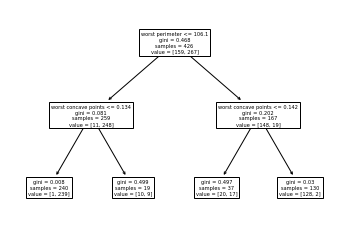

In [4]:
from sklearn.tree import plot_tree
tree_dot = plot_tree(tree, feature_names=cancer.feature_names)

### pre-pruning and post-pruning
Pre-pruning limits tree size. Pick one or two. Most common ones are max_depth and max_leaf_nodes. Others are min_samples_split, min_impurity_decrease, etc. 

Post-pruning: Cost complexity pruning:
R_alpha(T) = R(T) + alpha*|T|;
R(T) is total leaf impurity (how well you fit the train data);
|T| is number of leaf nodes (measure of the complexity);
alpha is free parameter.

In [5]:
from sklearn.model_selection import GridSearchCV

param_grid = {'max_depth':range(1, 7)}
#or param_grid = {'max_leaf_nodes':range(2, 20)}
#or param_grid = {'ccp_alpha':np.linspace(0., 0.03, 20)}
grid = GridSearchCV(DecisionTreeClassifier(random_state=0), param_grid=param_grid, cv=10)
grid.fit(X_train, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=0, splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': range(1, 7)}, pre_dispatch='2*n_jobs',
             refit=True, return_train_score=False

### More efficient pruning

In [6]:
clf = DecisionTreeClassifier(random_state=0)
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [7]:
#Feature Importance
tree.feature_importances_

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.87337408, 0.        , 0.        ,
       0.        , 0.        , 0.12662592, 0.        , 0.        ])

## Ensemble Models
Combine different models: built different models and find the average of the results

### Voting Classifier

In [10]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
voting = VotingClassifier([('logreg', LogisticRegression(C=100)),
                           ('tree', DecisionTreeClassifier(max_depth=3, random_state=0))], voting='soft')
voting.fit(X_train, y_train)
lr, tree = voting.estimators_
voting.score(X_test, y_test), lr.score(X_test, y_test), tree.score(X_test, y_test)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


(0.9300699300699301, 0.9370629370629371, 0.916083916083916)

### Bagging (Bootstrap AGGregation)
Injecting randomness to split sets to build slightly different models.

## Random Forest
Average of several trees. (In general scaling of the features are not needed in trees or random forest.)

Randomize in two ways:

For each tree, pick bootstrap sample of data.

For each splot, pick a random sample of features. 

Tuning random forests: main parameter is max_features, which for classification is ~sqrt(n_features) and for regression ~n_features. Random forests usually work with the default parameters. 

Warm-Starts are good for deciding how many trees are good enough.

### Warm-Starts

In [11]:
from sklearn.ensemble import RandomForestClassifier

train_scores = []
test_scores = []

rf = RandomForestClassifier(warm_start=True)
estimator_range = range(1, 100, 5)
for n_estimators in estimator_range:
    rf.n_estimators = n_estimators
    rf.fit(X_train, y_train)
    train_scores.append(rf.score(X_train, y_train))
    test_scores.append(rf.score(X_test, y_test))

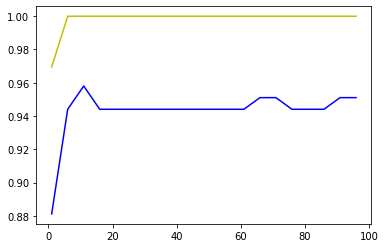

In [19]:
import matplotlib.pyplot as plt
plt.plot(estimator_range, train_scores, color='y')
plt.plot(estimator_range, test_scores, color='b')

### Out-of-bag estimates

In [21]:
train_scores = []
test_scores = []
oob_scores = []


feature_range = range(1, 20, 5)
for max_features in feature_range:
    rf = RandomForestClassifier(max_features=max_features, oob_score=True, n_estimators=200, random_state=0)
    rf.fit(X_train, y_train)
    train_scores.append(rf.score(X_train, y_train))
    test_scores.append(rf.score(X_test, y_test))
    oob_scores.append(rf.oob_score_)

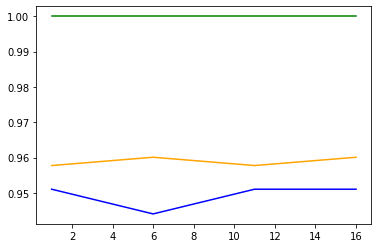

In [23]:
plt.plot(feature_range, train_scores, color='g')
plt.plot(feature_range, test_scores, color='b')
plt.plot(feature_range, oob_scores, color='orange')

### Variable Importance

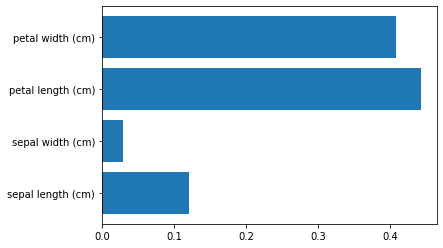

In [24]:
from sklearn.datasets import load_iris
iris = load_iris()

X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, stratify=iris.target, random_state=1)

rf = RandomForestClassifier().fit(X_train, y_train)
rf.feature_importances_

plt.barh(range(4), rf.feature_importances_)
plt.yticks(range(4), iris.feature_names);

## Stochastic Gradient Descent

In [ ]:
from sklearn.linear_model import SGDClassifier

#Run until convergence
sgd = SGDClassifier().fit(X_train, y_train)

#Run one iteration over a batched dataset
sgd = SGDClassifier()
for X_batch, y_batch in batches:
    sgd.partial_fit(X_batch, y_batch, classes=[0, 1, 2])
    
for i in range(10):
    for X_batch, y_batch in batches:
        sgd.partial_fit(X_batch, y_batch, classes=[0, 1, 2])

## Boosting
Family of algorithms to create strong learner from weak learners

AdaBoost, GentleBoost, LogitBoost


### Gradient Boosting
Next to linear models, it is very mostly commonly used in industry

Output is sum of all of the trees. 

HistGradientClassifier bins data so it is faster and also it is a multicore model. 

### XGBoost

conda install -c conda-forge xgboos

In [ ]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
xgb.score(X_test, y_test)

#supports missing values, GPU training, networked parallel training, monotonicity constraints, supports sparse data

### LightGBM

conda install -c conda-forge lightgbm

In [ ]:
from lightgbm.sklearn import LGBMClassifier
lgbm = LGBMClassifier()
lgbm.fit(X_train, y_train)
lgbm.score(X_test, y_test)

#supports missing values, natively supports categorical variables, GPU training, networked parallel training, monotonicity constraints, supports sparse data

### CatBoost

conda install -c conda-forge catboost

In [ ]:
from catboost.sklearn import CatBoostClassifier
catb = CatBoostClassifier()
catb.fit(X_train, y_train)
catb.score(X_test, y_test)

#optimized for categorical variables, uses one feature/threshold for all splits on a given level aka symmetric trees, symmetric trees are different but can be much faster, supports missing value, GPU training, monotonicity constraints, uses bagged and smoothed version of target encoding for categorical variables

In [5]:
#for the tabulated datasets, people use Gradient Boosting and for untabulated datasets, mostly use Neural Networks

## Confusion Matrix

(0,0): True Negative, 
(0,1): False Positive

(1,0): False Negative,
(1,1): True Positive

[[48  5]
 [ 4 86]]
0.9370629370629371


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


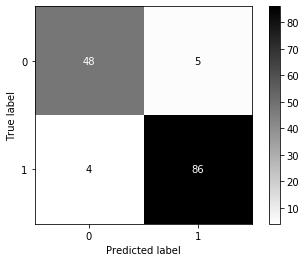

In [13]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from sklearn.linear_model import LogisticRegression

data = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, stratify=data.target, random_state=0)

lr = LogisticRegression().fit(X_train, y_train)
y_pred = lr.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(lr.score(X_test, y_test))
plot_confusion_matrix(lr, X_test, y_test, cmap='gray_r')

## Precision, Recall, F-score

Precision = TP / (TP + FP)

Recall = TP / (TP + FN)

F = 2 x (Precision x Recall) / (Precision + Recall)

In [ ]:
confusion_matrix(y_true, y_pred)
#or
confusion_matrix(y_true, y_pred, normalize='true')
#or
confusion_matrix(y_true, y_pred, normalize='pred')

In [ ]:
classification_report(y_true, y_pred)

In [ ]:
print("Weighted average: ", recall_score(y_test, y_pred_1, average="weighted"))
print("Macro average: ", recall_score(y_test, y_pred_1, average="macro"))

### Balanced Accuracy

= 1/2 (TP/(TP+FP) + TN/(TN+FN))

In [ ]:
balanced_accuracy_score(y_t, y_p) == recall_score(y_t, y_p, average='macro')

In [15]:
from sklearn.datasets import fetch_openml

In [16]:
data = fetch_openml('mammography', as_frame=True)

In [17]:
X, y = data.data, data.target

In [18]:
X.shape

(11183, 6)

In [19]:
y.value_counts()

-1    10923
1       260
Name: class, dtype: int64

In [21]:
#this allows sklearn to determine the positive class more easily and makes y boolean
X_train, X_test, y_train, y_test = train_test_split(X, y=='1', random_state=0)

In [26]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

svc = make_pipeline(StandardScaler(), SVC(C=100, gamma=0.1))
svc.fit(X_train, y_train)
svc.score(X_test, y_test)

0.9864091559370529

In [27]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.9881974248927039

In [28]:
y_pred_svc = svc.predict(X_test)
y_pred_rf = svc.predict(X_test)

In [30]:
print(confusion_matrix(y_test, y_pred_svc))

[[2724    8]
 [  30   34]]


In [38]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_svc))

              precision    recall  f1-score   support

       False       0.99      1.00      0.99      2732
        True       0.81      0.53      0.64        64

    accuracy                           0.99      2796
   macro avg       0.90      0.76      0.82      2796
weighted avg       0.98      0.99      0.99      2796



In [39]:
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

       False       0.99      1.00      0.99      2732
        True       0.81      0.53      0.64        64

    accuracy                           0.99      2796
   macro avg       0.90      0.76      0.82      2796
weighted avg       0.98      0.99      0.99      2796



### Precision-Recall Curve

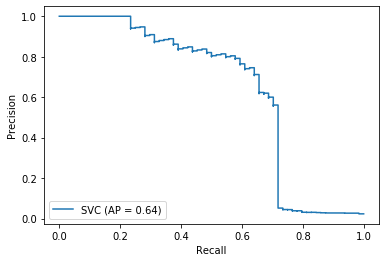

In [42]:
from sklearn.metrics import plot_precision_recall_curve

#maybe the closest distance to the top right corner is the best?!

prc = plot_precision_recall_curve(svc, X_test, y_test, name='SVC')

In [44]:
vars(prc)

{'precision': array([0.02307138, 0.02271908, 0.02272727, ..., 1.        , 1.        ,
        1.        ]),
 'recall': array([1.      , 0.984375, 0.984375, ..., 0.03125 , 0.015625, 0.      ]),
 'average_precision': 0.6352917371029126,
 'estimator_name': 'Pipeline',
 'line_': <matplotlib.lines.Line2D at 0x7fd2e30a2490>,
 'ax_': <matplotlib.axes._subplots.AxesSubplot at 0x7fd2e30a2790>,
 'figure_': <Figure size 432x288 with 1 Axes>}

### ROC Curve
Receiver Operating Characterisitics

True positive rate = recall

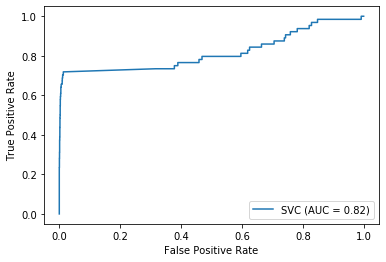

In [47]:
from sklearn.metrics import plot_roc_curve

plot_roc_curve(svc, X_test, y_test, name='SVC')

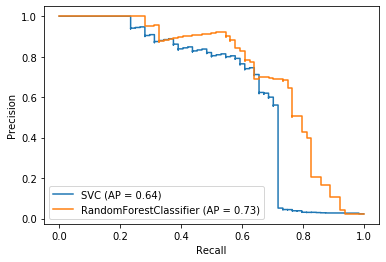

In [50]:
import matplotlib.pyplot as plt

prc = plot_precision_recall_curve(svc, X_test, y_test, name='SVC')
pr_rf = plot_precision_recall_curve(rf, X_test, y_test, ax=plt.gca())

## Area Under ROC Curve (AUC)

In [ ]:
dec = svc.decision_function(X_test)
np.all((dec>0) == svc.predict(X_test))

In [ ]:
print(f1_score(y_test, dec>0))
print(average_precision_score(y_test, dec))

## Threshold and Ranking Metrics

In [1]:
from sklearn.metrics import f1_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import roc_auc_score
#muller prefers average_precision_score over the roc_auc_score these days, even if it is harder to interpret.
#if you have imbalanced (or maybe he said something else) dataset, don't use accuracy.

## Multi-class classification

In [2]:
#people use multi-class ROC AUC
#one vs rest method is better than the one vs one, since it works for any kind of uncertainties
#https://github.com/scikit-learn/scikit-learn/pull/7663

#Threshold-based: accuracy, precision, recall, f1 (macro average, weighted)
#Ranking: OVR ROC AUC, OVO ROC AUC

In [4]:
from sklearn.metrics.scorer import SCORERS

/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.scorer module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


In [5]:
print("\n".join(sorted(SCORERS.keys())))

accuracy
adjusted_mutual_info_score
adjusted_rand_score
average_precision
balanced_accuracy
completeness_score
explained_variance
f1
f1_macro
f1_micro
f1_samples
f1_weighted
fowlkes_mallows_score
homogeneity_score
jaccard
jaccard_macro
jaccard_micro
jaccard_samples
jaccard_weighted
max_error
mutual_info_score
neg_brier_score
neg_log_loss
neg_mean_absolute_error
neg_mean_gamma_deviance
neg_mean_poisson_deviance
neg_mean_squared_error
neg_mean_squared_log_error
neg_median_absolute_error
neg_root_mean_squared_error
normalized_mutual_info_score
precision
precision_macro
precision_micro
precision_samples
precision_weighted
r2
recall
recall_macro
recall_micro
recall_samples
recall_weighted
roc_auc
roc_auc_ovo
roc_auc_ovo_weighted
roc_auc_ovr
roc_auc_ovr_weighted
v_measure_score


## Feature Selection
- More interpretable model
- Less storage for model and dataset
- Faster prediction and training

### Types of feature selection
- unsupervisoed vs supervides
- univariate vs multivariate
- model based or not

#### Unsupervised feature selection
- covariance-based: remove correlated features (most common)
- variance-based: 0 variance or mostly constant
- may discar important information
- PCA: remove linear subspaces (reduces the number of features without removing features)

**Plot Covariance Matrix**

In [5]:
import numpy as np
from sklearn.preprocessing import scale
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split

boston = load_boston()
X, y = boston.data, boston.target
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
X_train_scaled = scale(X_train)

cov = np.cov(X_train_scaled, rowvar=False)

In [24]:
X_train_scaled.shape

(379, 13)

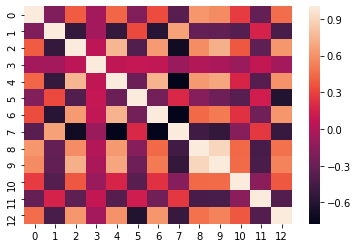

In [20]:
import seaborn as sns

sns.heatmap(cov)

In [7]:
from scipy.cluster import hierarchy

order = np.array(hierarchy.dendrogram(hierarchy.ward(cov), no_plot=True)['ivl'], dtype="int")

In [8]:
order

array([12,  6,  2,  4, 10,  0,  8,  9,  3,  1,  7,  5, 11])

In [36]:
orderList = list(order)
cov_rows = cov[:,orderList]
cov_ordered = cov_rows[orderList, :]

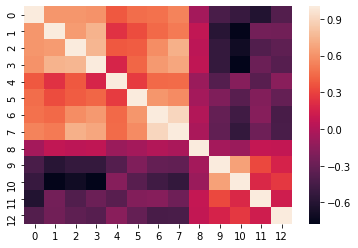

In [38]:
sns.heatmap(cov_ordered)

#### Supervised feature selection
- The simplest one is based on the univariate statistics. Look at p-value or f-value.

In [39]:
from sklearn.feature_selection import f_regression

f_values, p_values = f_regression(X, y)

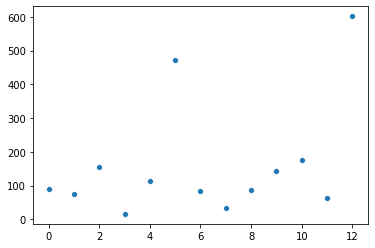

In [49]:
sns.scatterplot(sorted(order),f_values)

In [50]:
from sklearn.feature_selection import SelectKBest, SelectPercentile, SelectFpr
from sklearn.linear_model import RidgeCV

select = SelectKBest(k=2, score_func = f_regression)
select.fit(X_train, y_train)
print(X_train.shape)
print(select.transform(X_train).shape)

(379, 13)
(379, 2)


In [54]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score

all_features = make_pipeline(StandardScaler(), RidgeCV())

np.mean(cross_val_score(all_features, X_train, y_train, cv=10))

0.7179588510750902

In [58]:
select_2 = make_pipeline(StandardScaler(), SelectKBest(k=2, score_func=f_regression), RidgeCV())

np.mean(cross_val_score(select_2, X_train, y_train, cv=10))

0.6243625749168462

In [60]:
#mutual_info_regression is able to take on non-linear relationships.
from sklearn.feature_selection import mutual_info_regression

scores = mutual_info_regression(X_train, y_train, discrete_features=[3])

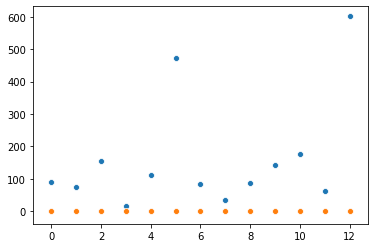

In [66]:
sns.scatterplot(sorted(order),f_values)
sns.scatterplot(sorted(order),scores)

### Model-Based Feature Selection
- Single fit: build a model, select features important to model. Could be Lasso, other linear models, tree-based models. Multivariate - linear models assume linear relation. 

In [67]:
from sklearn.linear_model import LassoCV

X_train_scaled = scale(X_train)
lasso = LassoCV().fit(X_train_scaled, y_train)
print(lasso.coef_)

[-0.8827688   0.94452435 -0.0877915   0.58901443 -1.67730936  2.64640135
 -0.14442202 -2.78038351  1.67056079 -1.59143582 -2.12859861  0.71729559
 -3.60974068]


In lasso, one way is to use the features that are non-zero. For a tree-based model, we can use permutation importance to pick the most important features.

### SelectFromModel

In [68]:
from sklearn.feature_selection import SelectFromModel

select_lassocv = SelectFromModel(LassoCV(), threshold=1e-5)
select_lassocv.fit(X_train, y_train)

print(select_lassocv.transform(X_train).shape)

(379, 11)


In [70]:
pipe_lassocv = make_pipeline(StandardScaler(), select_lassocv, RidgeCV())

print(np.mean(cross_val_score(pipe_lassocv, X_train, y_train, cv=10)))
print(np.mean(cross_val_score(all_features, X_train, y_train, cv=10)))

0.7171231551882247
0.7179588510750902


### Recursive Feature Elimination
- Uses feature importances/coefficients, similar to "SelectFromModel
- Iteratively removes features (one by one or in groups)
- Runtime: (n_features - n_feature_to_keep)/stepsize

In [71]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

rfe = RFE(LinearRegression(), n_features_to_select=1)
rfe.fit(X_train_scaled, y_train)
rfe.ranking_

array([ 9,  8, 13, 11,  5,  2, 12,  4,  7,  6,  3, 10,  1])

In [72]:
from sklearn.feature_selection import RFECV

rfe = RFECV(LinearRegression(), cv=10)
rfe.fit(X_train_scaled, y_train)

print(rfe.support_)
print(boston.feature_names[rfe.support_])

[ True  True False  True  True  True False  True  True  True  True  True
  True]
['CRIM' 'ZN' 'CHAS' 'NOX' 'RM' 'DIS' 'RAD' 'TAX' 'PTRATIO' 'B' 'LSTAT']


In [76]:
from sklearn.linear_model import RidgeCV

pipe_rfe_ridgecv = make_pipeline(StandardScaler(),RFECV(LinearRegression(), cv=10), RidgeCV())

np.mean(cross_val_score(pipe_rfe_ridgecv, X_train, y_train, cv=10))

0.710217843628884

### SequentialFeatureSelector

In [ ]:
from lxtend.feature_selection import SequentialFeatureSelector

sfs = SequentialFeatureSelector(LinearRegression(), forward=False, k_features=?)
sfs.fit(X_train_scaled, y_train)

print(sfs.k_feature_idx_)
print(boston.feature_names[np.array(sfs.k_feature_idx_)])
print(sfs.k_score_)

### RandomizedSearchCV

In [ ]:
from scipy.stats import randint

param_dist = {"max_depth": [3, None],
             "max_features": randint(1, 11),
             "min_samples_split": randint(2, 11),
             "bootstrap": [True, False],
             "criterion": ["gini", "entropy"]}

random_search = RandomizedSearchCV(clf, param_distributions=param_dist, n_iter=200)

### Bayesian Optimization or SMBO (sequential model based optimization)
An advanced method for global optimization. This is used for high dimensional parameter space that is continuous. Particularly useful for expensive models such as neural network. AlphaGo early iterations used this. Can be worked on 50-dimensions or so but not probably on 1000-dimensions. 

## Neural Network

Do not use scikitlearn for neural network except for trying problems. Does not support GPU and therefore is slow.

In [ ]:
mlp = MLPClassifier(solver='lbfgs', hidden_layer_size=(5,), activation='tanh', random_state=0).fit(X_train, y_train)
print(mlp.score(X_train, y_train))
print(mlp.score(X_test, y_test))

#hidden_layer_size=(5,) or hidden_layer_size=(10, 10, 10)

In [ ]:
from sklearn.neural_network import MLPRegressor

mlp_relu = MLPRegressor(solver="lbfgs").fit(X, y)
mlp_tanh = MLPRegressor(solver="lbfgs", activation='tanh').fit(X, y)

In [ ]:
pipe = make_pipeline(StandardScaler(), MLPClassifer(solver="lbfgs",random_state=0))

param_grid = {'mpclassifier__alpha': np.logspace(-3, 3, 7)}
grid = GridSearchCV(pipe, param_grid)

results = pd.DataFrame(grid.cv_results_)
res = results.pivot_table(index="param_mlpclassifier__alpha", values=["mean_test_score", "mean_train_score"])

### Keras
A high level library for the deep neural networks. Sequential interface in this course.

In [3]:
from keras.models import Sequential
from keras.layers import Dense, Activation

Using TensorFlow backend.

In [4]:
model = Sequential([
    Dense(32, input_shape=(784,)), #first matrix 784 x 32, the second one 32 x 10
    Activation('relu'),
    Dense(10),
    Activation('softmax')
])

In [6]:
# or 
model = Sequential()
model.add(Dense(32, input_dim=784))
model.add(Activation('relu'))

In [8]:
# or 
model = Sequential([
    Dense(32, input_shape=(784,), activation='relu'),
    Dense(10, activation='softmax')
])

In [9]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 32)                25120     
_________________________________________________________________
dense_4 (Dense)              (None, 10)                330       
Total params: 25,450
Trainable params: 25,450
Non-trainable params: 0
_________________________________________________________________


Param # is the number of parameters in each of the layers. The first layer has input layer of shape 32, the second 10. The size of matrix 32*10 + 10 for output = 330. The first one is 784*32 + 32 = 25120.

### Setting Optimizer and Compile 

Configures the learning process. 

In [ ]:
compile(self, optimizer, loss, metrics=None, sample_weight_mode=None)

In [11]:
model.compile("adam", "categorical_crossentropy", metrics=['accuracy'])

In [ ]:
fit(self, x, y, batch_size=32, epochs=10, verbose=1, callbacks=None, 
   validation_split=0.0, validation_Data=(x_val, y_val))
#batch_size 32 or 64 are very common.

In [12]:
from keras.datasets import mnist

In [13]:
import keras

In [14]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [15]:
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train /= 255
X_test /= 255

print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

60000 train samples
10000 test samples


In [16]:
num_classes = 10

# convert class vectors to binary class matrices. The following is similar to OneHotEncoding
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [17]:
# run a simple neural net on cpu of my laptop
model.fit(X_train, y_train, batch_size=128, epochs=10, verbose=1, validation_split=0.1)

Epoch 1/10
422/422 [==============================] - 1s 2ms/step - loss: 0.5314 - accuracy: 0.8514 - val_loss: 0.2274 - val_accuracy: 0.9375
Epoch 2/10
422/422 [==============================] - 0s 1ms/step - loss: 0.2451 - accuracy: 0.9309 - val_loss: 0.1768 - val_accuracy: 0.9518
Epoch 3/10
422/422 [==============================] - 1s 1ms/step - loss: 0.2016 - accuracy: 0.9421 - val_loss: 0.1596 - val_accuracy: 0.9567
Epoch 4/10
422/422 [==============================] - 0s 1ms/step - loss: 0.1755 - accuracy: 0.9498 - val_loss: 0.1465 - val_accuracy: 0.9602
Epoch 5/10
422/422 [==============================] - 0s 1ms/step - loss: 0.1588 - accuracy: 0.9547 - val_loss: 0.1354 - val_accuracy: 0.9642
Epoch 6/10
422/422 [==============================] - 0s 1ms/step - loss: 0.1453 - accuracy: 0.9578 - val_loss: 0.1281 - val_accuracy: 0.9648
Epoch 7/10
422/422 [==============================] - 0s 1ms/step - loss: 0.1343 - accuracy: 0.9608 - val_loss: 0.1245 - val_accuracy: 0.9643
Epoch 

In [18]:
score = model.evaluate(X_test, y_test, verbose=0)
print("Test Loss: {:.3f}".format(score[0]))
print("Test Accuracy: {:.3f}".format(score[1]))

Test Loss: 0.131
Test Accuracy: 0.962


### Loggers and Callbacks

In [20]:
history_callback = model.fit(X_train, y_train, batch_size=128, epochs=100, verbose=1, validation_split=0.1)

Epoch 1/100
422/422 [==============================] - 1s 1ms/step - loss: 0.0049 - accuracy: 0.9987 - val_loss: 0.2264 - val_accuracy: 0.9692
Epoch 2/100
422/422 [==============================] - 1s 1ms/step - loss: 0.0029 - accuracy: 0.9998 - val_loss: 0.2272 - val_accuracy: 0.9683
Epoch 3/100
422/422 [==============================] - 0s 1ms/step - loss: 0.0017 - accuracy: 0.9999 - val_loss: 0.2164 - val_accuracy: 0.9708
Epoch 4/100
422/422 [==============================] - 0s 1ms/step - loss: 0.0016 - accuracy: 0.9999 - val_loss: 0.2230 - val_accuracy: 0.9702
Epoch 5/100
422/422 [==============================] - 0s 1ms/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 0.2261 - val_accuracy: 0.9697
Epoch 6/100
422/422 [==============================] - 0s 1ms/step - loss: 0.0020 - accuracy: 0.9997 - val_loss: 0.2356 - val_accuracy: 0.9682
Epoch 7/100
422/422 [==============================] - 0s 1ms/step - loss: 0.0075 - accuracy: 0.9975 - val_loss: 0.2305 - val_accuracy: 0.9695

422/422 [==============================] - 0s 1ms/step - loss: 0.0061 - accuracy: 0.9979 - val_loss: 0.3006 - val_accuracy: 0.9680
Epoch 58/100
422/422 [==============================] - 0s 1ms/step - loss: 0.0031 - accuracy: 0.9990 - val_loss: 0.2715 - val_accuracy: 0.9700
Epoch 59/100
422/422 [==============================] - 0s 1ms/step - loss: 0.0010 - accuracy: 0.9999 - val_loss: 0.2749 - val_accuracy: 0.9697
Epoch 60/100
422/422 [==============================] - 0s 1ms/step - loss: 4.4821e-04 - accuracy: 1.0000 - val_loss: 0.2734 - val_accuracy: 0.9698
Epoch 61/100
422/422 [==============================] - 0s 1ms/step - loss: 3.6166e-04 - accuracy: 1.0000 - val_loss: 0.2733 - val_accuracy: 0.9698
Epoch 62/100
422/422 [==============================] - 0s 1ms/step - loss: 3.2856e-04 - accuracy: 1.0000 - val_loss: 0.2749 - val_accuracy: 0.9697
Epoch 63/100
422/422 [==============================] - 0s 1ms/step - loss: 3.1834e-04 - accuracy: 1.0000 - val_loss: 0.2752 - val_accura

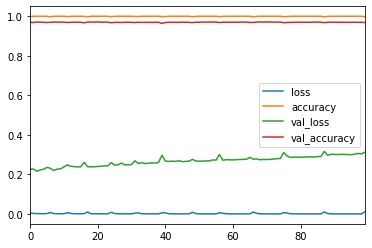

In [21]:
import pandas as pd

pd.DataFrame(history_callback.history).plot()

### Wrappers for sklearn

In [22]:
from keras.wrappers.scikit_learn import KerasClassifier, KerasRegressor
from sklearn.model_selection import GridSearchCV

In [25]:
def make_model(optimizer="adam", hidden_size=32):
    model = Sequential([
        Dense(hidden_size, input_shape=(784,)),
        Activation('relu'),
        Dense(10),
        Activation('softmax'),
    ])
    model.compile(optimizer=optimizer, loss="categorical_crossentropy",
                 metrics=['accuracy'])
    return model

In [26]:
clf = KerasClassifier(make_model)
param_grid = {'epochs': [1, 5, 10],
             'hidden_size': [32, 64, 256]}
grid = GridSearchCV(clf, param_grid=param_grid)
grid.fit(X_train, y_train)

375/375 [==============================] - 0s 800us/step - loss: 0.1375 - accuracy: 0.9603
Epoch 1/5
1500/1500 [==============================] - 1s 791us/step - loss: 0.3971 - accuracy: 0.8889
Epoch 2/5
1500/1500 [==============================] - 1s 878us/step - loss: 0.2274 - accuracy: 0.9339
Epoch 3/5
1500/1500 [==============================] - 1s 842us/step - loss: 0.1812 - accuracy: 0.9473
Epoch 4/5
1500/1500 [==============================] - 1s 776us/step - loss: 0.1508 - accuracy: 0.9557
Epoch 5/5
375/375 [==============================] - 0s 626us/step - loss: 0.1485 - accuracy: 0.9558
Epoch 1/5
1500/1500 [==============================] - 1s 780us/step - loss: 0.3734 - accuracy: 0.8964
Epoch 2/5
1500/1500 [==============================] - 1s 848us/step - loss: 0.1990 - accuracy: 0.9415
Epoch 3/5
1500/1500 [==============================] - 1s 883us/step - loss: 0.1572 - accuracy: 0.9538
Epoch 4/5
1500/1500 [==============================] - 1s 853us/step - loss: 0.1335 - a

375/375 [==============================] - 0s 744us/step - loss: 0.1234 - accuracy: 0.9650
Epoch 1/5
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3306 - accuracy: 0.9072
Epoch 2/5
1500/1500 [==============================] - 2s 1ms/step - loss: 0.1590 - accuracy: 0.9536: 0s - loss: 0.1648 - ac
Epoch 3/5
1500/1500 [==============================] - 1s 981us/step - loss: 0.1157 - accuracy: 0.9660
Epoch 4/5
1500/1500 [==============================] - 1s 948us/step - loss: 0.0916 - accuracy: 0.9729
Epoch 5/5
375/375 [==============================] - 0s 710us/step - loss: 0.1060 - accuracy: 0.9695
Epoch 1/5
1500/1500 [==============================] - 2s 1ms/step - loss: 0.2470 - accuracy: 0.9289: 0s
Epoch 2/5
1500/1500 [==============================] - 2s 1ms/step - loss: 0.1040 - accuracy: 0.9680
Epoch 3/5
1500/1500 [==============================] - 2s 1ms/step - loss: 0.0687 - accuracy: 0.9788
Epoch 4/5
1500/1500 [==============================] - 2s 1ms/step - 

375/375 [==============================] - 0s 649us/step - loss: 0.1494 - accuracy: 0.9557
Epoch 1/10
1500/1500 [==============================] - 1s 816us/step - loss: 0.3911 - accuracy: 0.8932
Epoch 2/10
1500/1500 [==============================] - 1s 815us/step - loss: 0.2075 - accuracy: 0.9405
Epoch 3/10
1500/1500 [==============================] - 1s 828us/step - loss: 0.1621 - accuracy: 0.9520
Epoch 4/10
1500/1500 [==============================] - 1s 829us/step - loss: 0.1350 - accuracy: 0.9606
Epoch 5/10
1500/1500 [==============================] - 1s 832us/step - loss: 0.1165 - accuracy: 0.9659
Epoch 6/10
1500/1500 [==============================] - 1s 811us/step - loss: 0.1022 - accuracy: 0.9703
Epoch 7/10
1500/1500 [==============================] - 1s 802us/step - loss: 0.0903 - accuracy: 0.9734
Epoch 8/10
1500/1500 [==============================] - 1s 811us/step - loss: 0.0833 - accuracy: 0.9750
Epoch 9/10
1500/1500 [==============================] - 1s 824us/step - loss:

1500/1500 [==============================] - 2s 1ms/step - loss: 0.2471 - accuracy: 0.9273
Epoch 2/10
1500/1500 [==============================] - 2s 1ms/step - loss: 0.1018 - accuracy: 0.9694
Epoch 3/10
1500/1500 [==============================] - 2s 1ms/step - loss: 0.0668 - accuracy: 0.9804
Epoch 4/10
1500/1500 [==============================] - 2s 1ms/step - loss: 0.0493 - accuracy: 0.9855
Epoch 5/10
1500/1500 [==============================] - 2s 1ms/step - loss: 0.0358 - accuracy: 0.9890
Epoch 6/10
1500/1500 [==============================] - 2s 1ms/step - loss: 0.0272 - accuracy: 0.9914
Epoch 7/10
1500/1500 [==============================] - 2s 1ms/step - loss: 0.0213 - accuracy: 0.9937
Epoch 8/10
1500/1500 [==============================] - 2s 1ms/step - loss: 0.0172 - accuracy: 0.9948
Epoch 9/10
1500/1500 [==============================] - 2s 1ms/step - loss: 0.0143 - accuracy: 0.9956
Epoch 10/10
375/375 [==============================] - 0s 826us/step - loss: 0.0971 - accurac

GridSearchCV(cv=None, error_score=nan,
             estimator=<tensorflow.python.keras.wrappers.scikit_learn.KerasClassifier object at 0x7ffbc1fb6890>,
             iid='deprecated', n_jobs=None,
             param_grid={'epochs': [1, 5, 10], 'hidden_size': [32, 64, 256]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [31]:
res = pd.DataFrame(grid.cv_results_)
res.pivot_table(index=["param_epochs", "param_hidden_size"],
              values=['mean_test_score'])

mean_test_score
param_epochs param_hidden_size                 
1            32                        0.932867
             64                        0.939067
             256                       0.956350
5            32                        0.955733
             64                        0.967050
             256                       0.973233
10           32                        0.961633
             64                        0.970967
             256                       0.975767

In [29]:
res

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_epochs,param_hidden_size,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,1.682788,0.054169,0.372511,0.026101,1,32,"{'epochs': 1, 'hidden_size': 32}",0.937000,0.933750,0.931583,0.924250,0.937750,0.932867,0.004850,9
1,1.798910,0.033379,0.386277,0.020759,1,64,"{'epochs': 1, 'hidden_size': 64}",0.943750,0.938417,0.943000,0.930833,0.939333,0.939067,0.004598,8
2,2.568483,0.225748,0.427653,0.016783,1,256,"{'epochs': 1, 'hidden_size': 256}",0.960500,0.955833,0.955417,0.949750,0.960250,0.956350,0.003928,6
3,6.768586,0.231140,0.360239,0.023207,5,32,"{'epochs': 5, 'hidden_size': 32}",0.955833,0.954250,0.952833,0.954833,0.960917,0.955733,0.002768,7
4,8.449041,0.368634,0.411714,0.008787,5,64,"{'epochs': 5, 'hidden_size': 64}",0.968750,0.965417,0.966583,0.965000,0.969500,0.967050,0.001788,4
5,10.518342,0.193773,0.432971,0.013694,5,256,"{'epochs': 5, 'hidden_size': 256}",0.973500,0.976500,0.971750,0.970500,0.973917,0.973233,0.002044,2
6,13.248056,0.253227,0.377345,0.005746,10,32,"{'epochs': 10, 'hidden_size': 32}",0.965083,0.962167,0.957583,0.955750,0.967583,0.961633,0.004441,5
7,15.140566,0.073578,0.405299,0.002727,10,64,"{'epochs': 10, 'hidden_size': 64}",0.971917,0.969250,0.970833,0.968083,0.974750,0.970967,0.002302,3
8,21.587632,0.313917,0.452671,0.013569,10,256,"{'epochs': 10, 'hidden_size': 256}",0.974417,0.975333,0.976417,0.973250,0.979417,0.975767,0.002102,1


### Convolutional Neural Networks
If you are working on images, you'd like your model to be invariant to small translation. One way to encode this translation in variance is weight sharing, which means you apply the same coefficients to different locations in the image. 

#### Preparing Data

In [33]:
batch_size = 128
num_classes = 10
epochs = 12

# input image dimensions
img_rows, img_cols = 28, 28

# the data, shuffled and split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

X_train_images = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
X_test_images = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
input_shape = (img_rows, img_cols, 1)

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

#### Create a tiny network

In [34]:
from keras.layers import Conv2D, MaxPooling2D, Flatten

num_classes = 10
cnn = Sequential()
cnn.add(Conv2D(32, kernel_size=(3, 3),
              activation='relu',
              input_shape=input_shape))

cnn.add(MaxPooling2D(pool_size=(2, 2)))
cnn.add(Conv2D(32, (3, 3,), activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2, 2)))
cnn.add(Flatten())
cnn.add(Dense(64, activation='relu'))
cnn.add(Dense(num_classes, activation='softmax'))

In [35]:
cnn.compile("adam", "categorical_crossentropy", metrics=['accuracy'])

history_cnn = cnn.fit(X_train_images, y_train, batch_size=128, epochs=20, verbose=1, validation_split=0.1)

cnn.evaluate(X_test_images, y_test)

Epoch 1/20
422/422 [==============================] - 19s 45ms/step - loss: 0.8007 - accuracy: 0.8724 - val_loss: 0.1027 - val_accuracy: 0.9685
Epoch 2/20
422/422 [==============================] - 17s 40ms/step - loss: 0.0949 - accuracy: 0.9712 - val_loss: 0.0702 - val_accuracy: 0.9815
Epoch 3/20
422/422 [==============================] - 17s 41ms/step - loss: 0.0586 - accuracy: 0.9816 - val_loss: 0.0652 - val_accuracy: 0.9830
Epoch 4/20
422/422 [==============================] - 17s 41ms/step - loss: 0.0426 - accuracy: 0.9865 - val_loss: 0.0639 - val_accuracy: 0.9832
Epoch 5/20
422/422 [==============================] - 17s 41ms/step - loss: 0.0348 - accuracy: 0.9889 - val_loss: 0.0546 - val_accuracy: 0.9865
Epoch 6/20
422/422 [==============================] - 17s 41ms/step - loss: 0.0292 - accuracy: 0.9903 - val_loss: 0.0662 - val_accuracy: 0.9833
Epoch 7/20
422/422 [==============================] - 17s 40ms/step - loss: 0.0228 - accuracy: 0.9923 - val_loss: 0.0649 - val_accuracy:

[0.07107798755168915, 0.9866999983787537]

In [ ]:
weights, biases = cnn.layers[0].get_weights()
weights2, biases2 = cnn.layers[2].get_weights()
print(weights.shape)
print(weights2.shape)